<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import normalize
from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense
from keras.datasets import boston_housing, mnist
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.8, test_size = 0.2)

In [5]:
scaler = MinMaxScaler()

In [6]:
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

In [7]:
model = Sequential([
    Dense(128, activation= 'sigmoid', input_shape=(13,)),
    Dense(64, activation= 'relu'),
    Dense(32, activation= 'relu'),
    Dense(16, activation= 'relu'),
    Dense(1, activation= 'relu')
])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [9]:
hist = model.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 1s 2ms/step - loss: 519.6991 - val_loss: 517.7893
Epoch 2/100
323/323 [==============================] - 0s 71us/step - loss: 396.2005 - val_loss: 346.1421
Epoch 3/100
323/323 [==============================] - 0s 77us/step - loss: 222.4178 - val_loss: 169.8095
Epoch 4/100
323/323 [==============================] - 0s 49us/step - loss: 102.5136 - val_loss: 107.0310
Epoch 5/100
323/323 [==============================] - 0s 133us/step - loss: 88.0625 - val_loss: 106.7570
Epoch 6/100
323/323 [==============================] - 0s 62us/step - loss: 83.2114 - val_loss: 102.9403
Epoch 7/100
323/323 [==============================] - 0s 77us/step - loss: 78.1975 - val_loss: 103.7383
Epoch 8/100
323/323 [==============================] - 0s 74us/step - loss: 77.5906 - val_loss: 100.6697
Epoch 9/100
323/323 [==============================] - 0s 77us/

In [10]:
model = LinearRegression()

In [11]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
val_pred= model.predict(x_val)

In [13]:
mean_squared_error(val_pred, y_val)

27.352629671318685

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [16]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

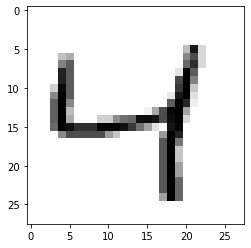

In [17]:
plt.imshow(x_train[2], cmap= plt.cm.binary)
plt.show()

In [18]:
x_train= normalize(x_train, axis= 1)
x_test= normalize(x_test, axis= 1)

In [19]:
model = Sequential([
    Flatten(),
    Dense(128, activation= 'relu'),
    Dense(10, activation= 'softmax')])

In [20]:
model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [22]:
hist = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0440 - acc: 0.9873
Epoch 2/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0343 - acc: 0.9902
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0280 - acc: 0.9918
Epoch 4/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0222 - acc: 0.9938
Epoch 5/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0178 - acc: 0.9954
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0138 - acc: 0.9964
Epoch 7/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0114 - acc: 0.9973
Epoch 8/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0086 - acc: 0.9984
Epoch 9/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0080 - acc: 0.9980
Epoch 10/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0062 - acc: 0.9987

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.